# Human diseases and symptoms 

A bipartite network of human diseases and their associated symptoms, as extracted from PubMed's biomedical literature in c.2014 using TF-IDF weighted co-occurrences derived from the MeSH metadata field. Edges are weighted by the TF-IDF score and PubMed occurrence count, and nodes are labeled with the associated MeSH disease or symptom term

Paper: [Human symptoms–disease network](https://www.nature.com/articles/ncomms5212)

## Libraries

In [142]:
# Installing packages

In [143]:
!pip install python_louvain

In [144]:
# Importing libraries

In [145]:
import pandas as pd
import networkx as nx
import collections
import statistics as stats
import time
from matplotlib import pyplot as plt
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import bipartite
from community import community_louvain # for nxv2

In [146]:
# disable auto-scrolling

In [147]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Exploratory Data and Pre-Processing

#### Supplementary Data 1    
List of all 4,442 diseases within PubMed and their occurrence. (TXT 113 kb)

#### Supplementary Data 2    
List of all 322 symptoms within PubMed and their occurrence. (TXT 6 kb)

#### Supplementary Data 3    
Term co-occurrences between symptoms and diseases measured by TF-IDF weighted values. This table includes 147,978 records of symptom and disease relationships. (TXT 7797 kb)

#### Supplementary Data 4    
List of disease links in the disease network with both significant shared symptoms and shared genes/PPIs. In total there are 133,106 such connections between 1,596 distinct diseases. (TXT 7801 kb)

    

In [148]:
data1 = pd.read_csv("data/41467_2014_BFncomms5212_MOESM1043_ESM.txt", delimiter = "\t")
data2 = pd.read_csv("data/41467_2014_BFncomms5212_MOESM1044_ESM.txt", delimiter = "\t")
data3 = pd.read_csv("data/41467_2014_BFncomms5212_MOESM1045_ESM.txt", delimiter = "\t")
data4 = pd.read_csv("data/41467_2014_BFncomms5212_MOESM1046_ESM.txt", delimiter = "\t")

In [149]:
data1

MeSH Disease Term  PubMed occurrence
0                    Breast Neoplasms             122226
1                        Hypertension             107294
2             Coronary Artery Disease              82819
3                      Lung Neoplasms              78009
4               Myocardial Infarction              75945
...                               ...                ...
4437  Mannosidase Deficiency Diseases                  1
4438             White Heifer Disease                  1
4439                        Tetrasomy                  1
4440                    Milk Sickness                  1
4441    Intrauterine Device Migration                  1

[4442 rows x 2 columns]

In [150]:
data2

MeSH Symptom Term  PubMed occurrence
0                                  Body Weight             147857
1                                         Pain             103168
2                                      Obesity             100301
3                                       Anoxia              47351
4                           Mental Retardation              43883
..                                         ...                ...
317                        Alien Hand Syndrome                 10
318              Necrolytic Migratory Erythema                  7
319                        Body Weight Changes                  4
320                    Slit Ventricle Syndrome                  3
321  Infantile Apparent Life-Threatening Event                  2

[322 rows x 2 columns]

In [151]:
data3

MeSH Symptom Term                       MeSH Disease Term  \
0       Aging, Premature  Respiratory Syncytial Virus Infections   
1       Aging, Premature             Orthomyxoviridae Infections   
2       Aging, Premature                          HIV Infections   
3       Aging, Premature      Acquired Immunodeficiency Syndrome   
4       Aging, Premature                        Breast Neoplasms   
...                  ...                                     ...   
147973         Hirsutism                    Tobacco Use Disorder   
147974         Hirsutism                        Radius Fractures   
147975         Hirsutism                                   Burns   
147976         Hirsutism                        Colles' Fracture   
147977         Hirsutism                      Radiation Injuries   

        PubMed occurrence  TFIDF score  
0                       1     3.464551  
1                       1     3.464551  
2                       3    10.393654  
3                       3    10.393654  
4                       1     3.464551  
...                   ...          ...  
147973                  1     2.483722  
147974                  1     2.483722  
147975                  1     2.483722  
147976                  1     2.483722  
147977                  1     2.483722  

[147978 rows x 4 columns]

In [152]:
data4

MeSH Disease Term  \
0            Histiocytoma, Benign Fibrous   
1            Histiocytoma, Benign Fibrous   
2                 Arthropathy, Neurogenic   
3                 Arthropathy, Neurogenic   
4       Hemangioendothelioma, Epithelioid   
...                                   ...   
133101                             Myopia   
133102                             Myopia   
133103                     IgA Deficiency   
133104                     IgA Deficiency   
133105                        Torticollis   

                            MeSH Disease Term.1  symptom similarity score  
0                                      Aneurysm                  0.591937  
1                         Carcinoma, Basal Cell                  0.310479  
2               Corneal Dystrophies, Hereditary                  0.133123  
3                  Foot Deformities, Congenital                  0.156900  
4                             Thyroid Neoplasms                  0.157077  
...                                         ...                       ...  
133101                            Hypotrichosis                  0.140889  
133102                     Vitamin A Deficiency                  0.199410  
133103                        Intestinal Polyps                  0.142195  
133104  Autoimmune Lymphoproliferative Syndrome                  0.561311  
133105                           Cryptorchidism                  0.104462  

[133106 rows x 3 columns]

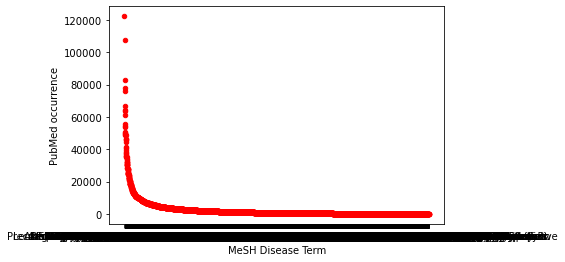

In [153]:
data1.plot(kind='scatter',x='MeSH Disease Term',y='PubMed occurrence',color='red')
plt.show()

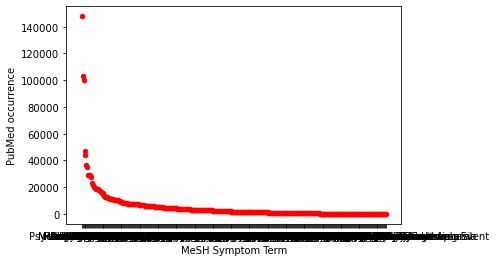

In [154]:
data2.plot(kind='scatter',x='MeSH Symptom Term',y='PubMed occurrence',color='red')
plt.show()

In [155]:
data_sd = data3[data3["PubMed occurrence"]>=150]

In [156]:
data_sd = data_sd[data_sd["MeSH Symptom Term"]!=data_sd["MeSH Disease Term"]]

In [157]:
data_sd

MeSH Symptom Term                MeSH Disease Term  \
668                            Fever             Bacterial Infections   
669                            Fever                       Bacteremia   
816                            Fever        Staphylococcal Infections   
837                            Fever                        Infection   
869                            Fever                           Sepsis   
...                              ...                              ...   
147273  Urinary Incontinence, Stress      Postoperative Complications   
147461                      Virilism                Ovarian Neoplasms   
147530                      Virilism  Adrenal Hyperplasia, Congenital   
147641                     Hirsutism        Polycystic Ovary Syndrome   
147895                     Hirsutism                   Hypertrichosis   

        PubMed occurrence  TFIDF score  
668                   651   402.928399  
669                   279   172.683599  
816                   151    93.459582  
837                   397   245.718240  
869                   326   201.773668  
...                   ...          ...  
147273                196   549.226490  
147461                306   681.479134  
147530                187   416.459471  
147641                471  1169.833173  
147895               1753  4353.965081  

[965 rows x 4 columns]

## Bipartite Graph

In [158]:
edges = data_sd.reindex(columns=["MeSH Symptom Term","MeSH Disease Term"])
edges

MeSH Symptom Term                MeSH Disease Term
668                            Fever             Bacterial Infections
669                            Fever                       Bacteremia
816                            Fever        Staphylococcal Infections
837                            Fever                        Infection
869                            Fever                           Sepsis
...                              ...                              ...
147273  Urinary Incontinence, Stress      Postoperative Complications
147461                      Virilism                Ovarian Neoplasms
147530                      Virilism  Adrenal Hyperplasia, Congenital
147641                     Hirsutism        Polycystic Ovary Syndrome
147895                     Hirsutism                   Hypertrichosis

[965 rows x 2 columns]

In [159]:
part0 = edges['MeSH Symptom Term'].unique()
len(part0)

171

In [160]:
part1 = edges['MeSH Disease Term'].unique()
len(part1)

430

In [161]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [162]:
# Find common symptoms - disseases, not useful 
comm = intersection(part0, part1)
len(comm)

69

In [163]:
# Remove the rows that are in comm
edges = edges[~edges['MeSH Symptom Term'].isin(comm)]

In [164]:
# Delete duplicate rows
edges_ = edges.drop_duplicates(subset=["MeSH Symptom Term","MeSH Disease Term"], keep=False)

In [165]:
edges_

MeSH Symptom Term                MeSH Disease Term
668                            Fever             Bacterial Infections
669                            Fever                       Bacteremia
816                            Fever        Staphylococcal Infections
837                            Fever                        Infection
869                            Fever                           Sepsis
...                              ...                              ...
147273  Urinary Incontinence, Stress      Postoperative Complications
147461                      Virilism                Ovarian Neoplasms
147530                      Virilism  Adrenal Hyperplasia, Congenital
147641                     Hirsutism        Polycystic Ovary Syndrome
147895                     Hirsutism                   Hypertrichosis

[433 rows x 2 columns]

In [166]:
part0 = edges_['MeSH Symptom Term'].unique()
#part0

In [167]:
part1 = edges_['MeSH Disease Term'].unique()
#part1

In [168]:
## Symptom // Disease
joins = list(edges_.to_records(index=False))
#joins

In [169]:
BI = nx.Graph()
BI.add_nodes_from(part0, bipartite=0)
BI.add_nodes_from(part1, bipartite=1)
BI.add_edges_from(joins)

In [170]:
print(nx.info(BI))

Name: 
Type: Graph
Number of nodes: 364
Number of edges: 433
Average degree:   2.3791


In [171]:
# Taking the largest connected component
components = sorted(nx.connected_components(BI), key=len, reverse=True)
largest_component = components[0]
BII = BI.subgraph(largest_component)

In [172]:
print(nx.info(BII))

Name: 
Type: Graph
Number of nodes: 306
Number of edges: 394
Average degree:   2.5752


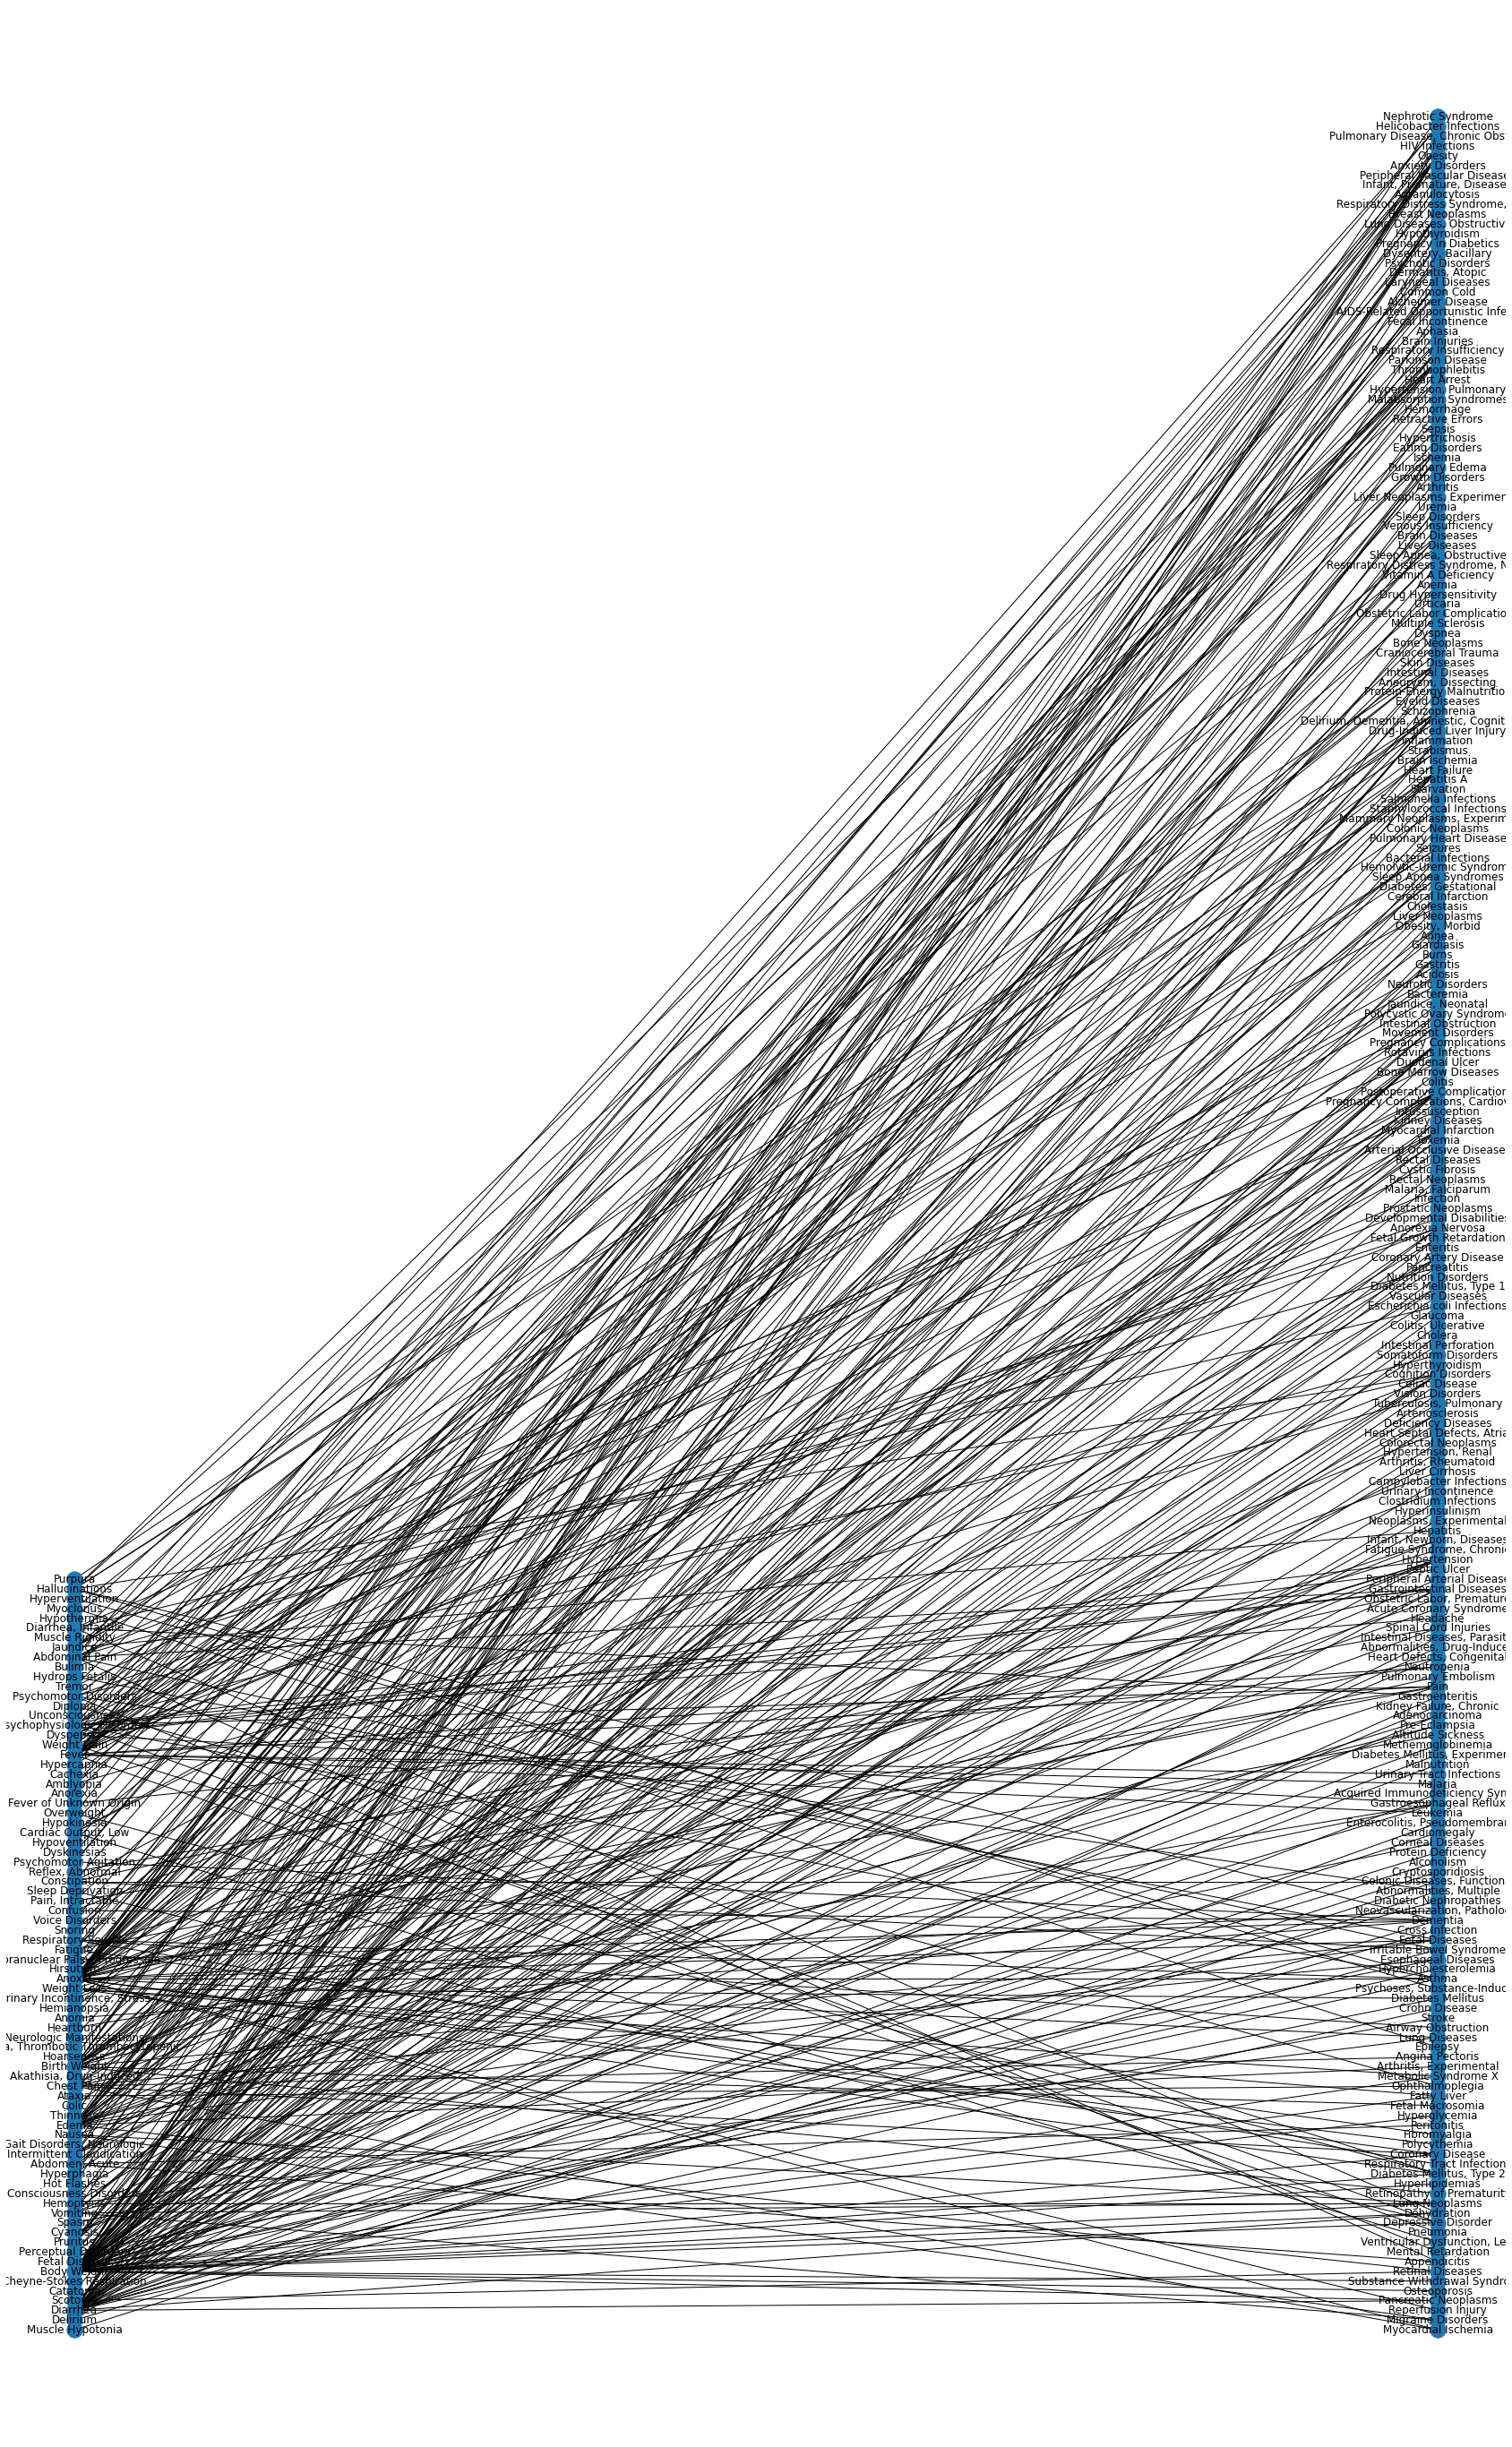

In [173]:
## Symptoms // Diseases

fig = plt.figure(figsize = (30, 50))
ax = fig.add_subplot(111)
ax.axis('off')

N1, N2 = bipartite.sets(BII)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(N1) ) # put nodes from N1
pos.update( (n, (2, i)) for i, n in enumerate(N2) ) # put nodes from N2
nx.draw(BII, pos=pos, with_labels=True)
plt.show()

In [174]:
Gph_N1 = bipartite.projected_graph(BII, N1, multigraph=False)
Gph_N2 = bipartite.projected_graph(BII, N2, multigraph=False)
print(nx.info(Gph_N1))
print(nx.info(Gph_N2))

Name: 
Type: Graph
Number of nodes: 78
Number of edges: 252
Average degree:   6.4615
Name: 
Type: Graph
Number of nodes: 228
Number of edges: 3877
Average degree:  34.0088


## Visualization: Symptoms

Time elapsed to get the graph layout:  0.019256591796875


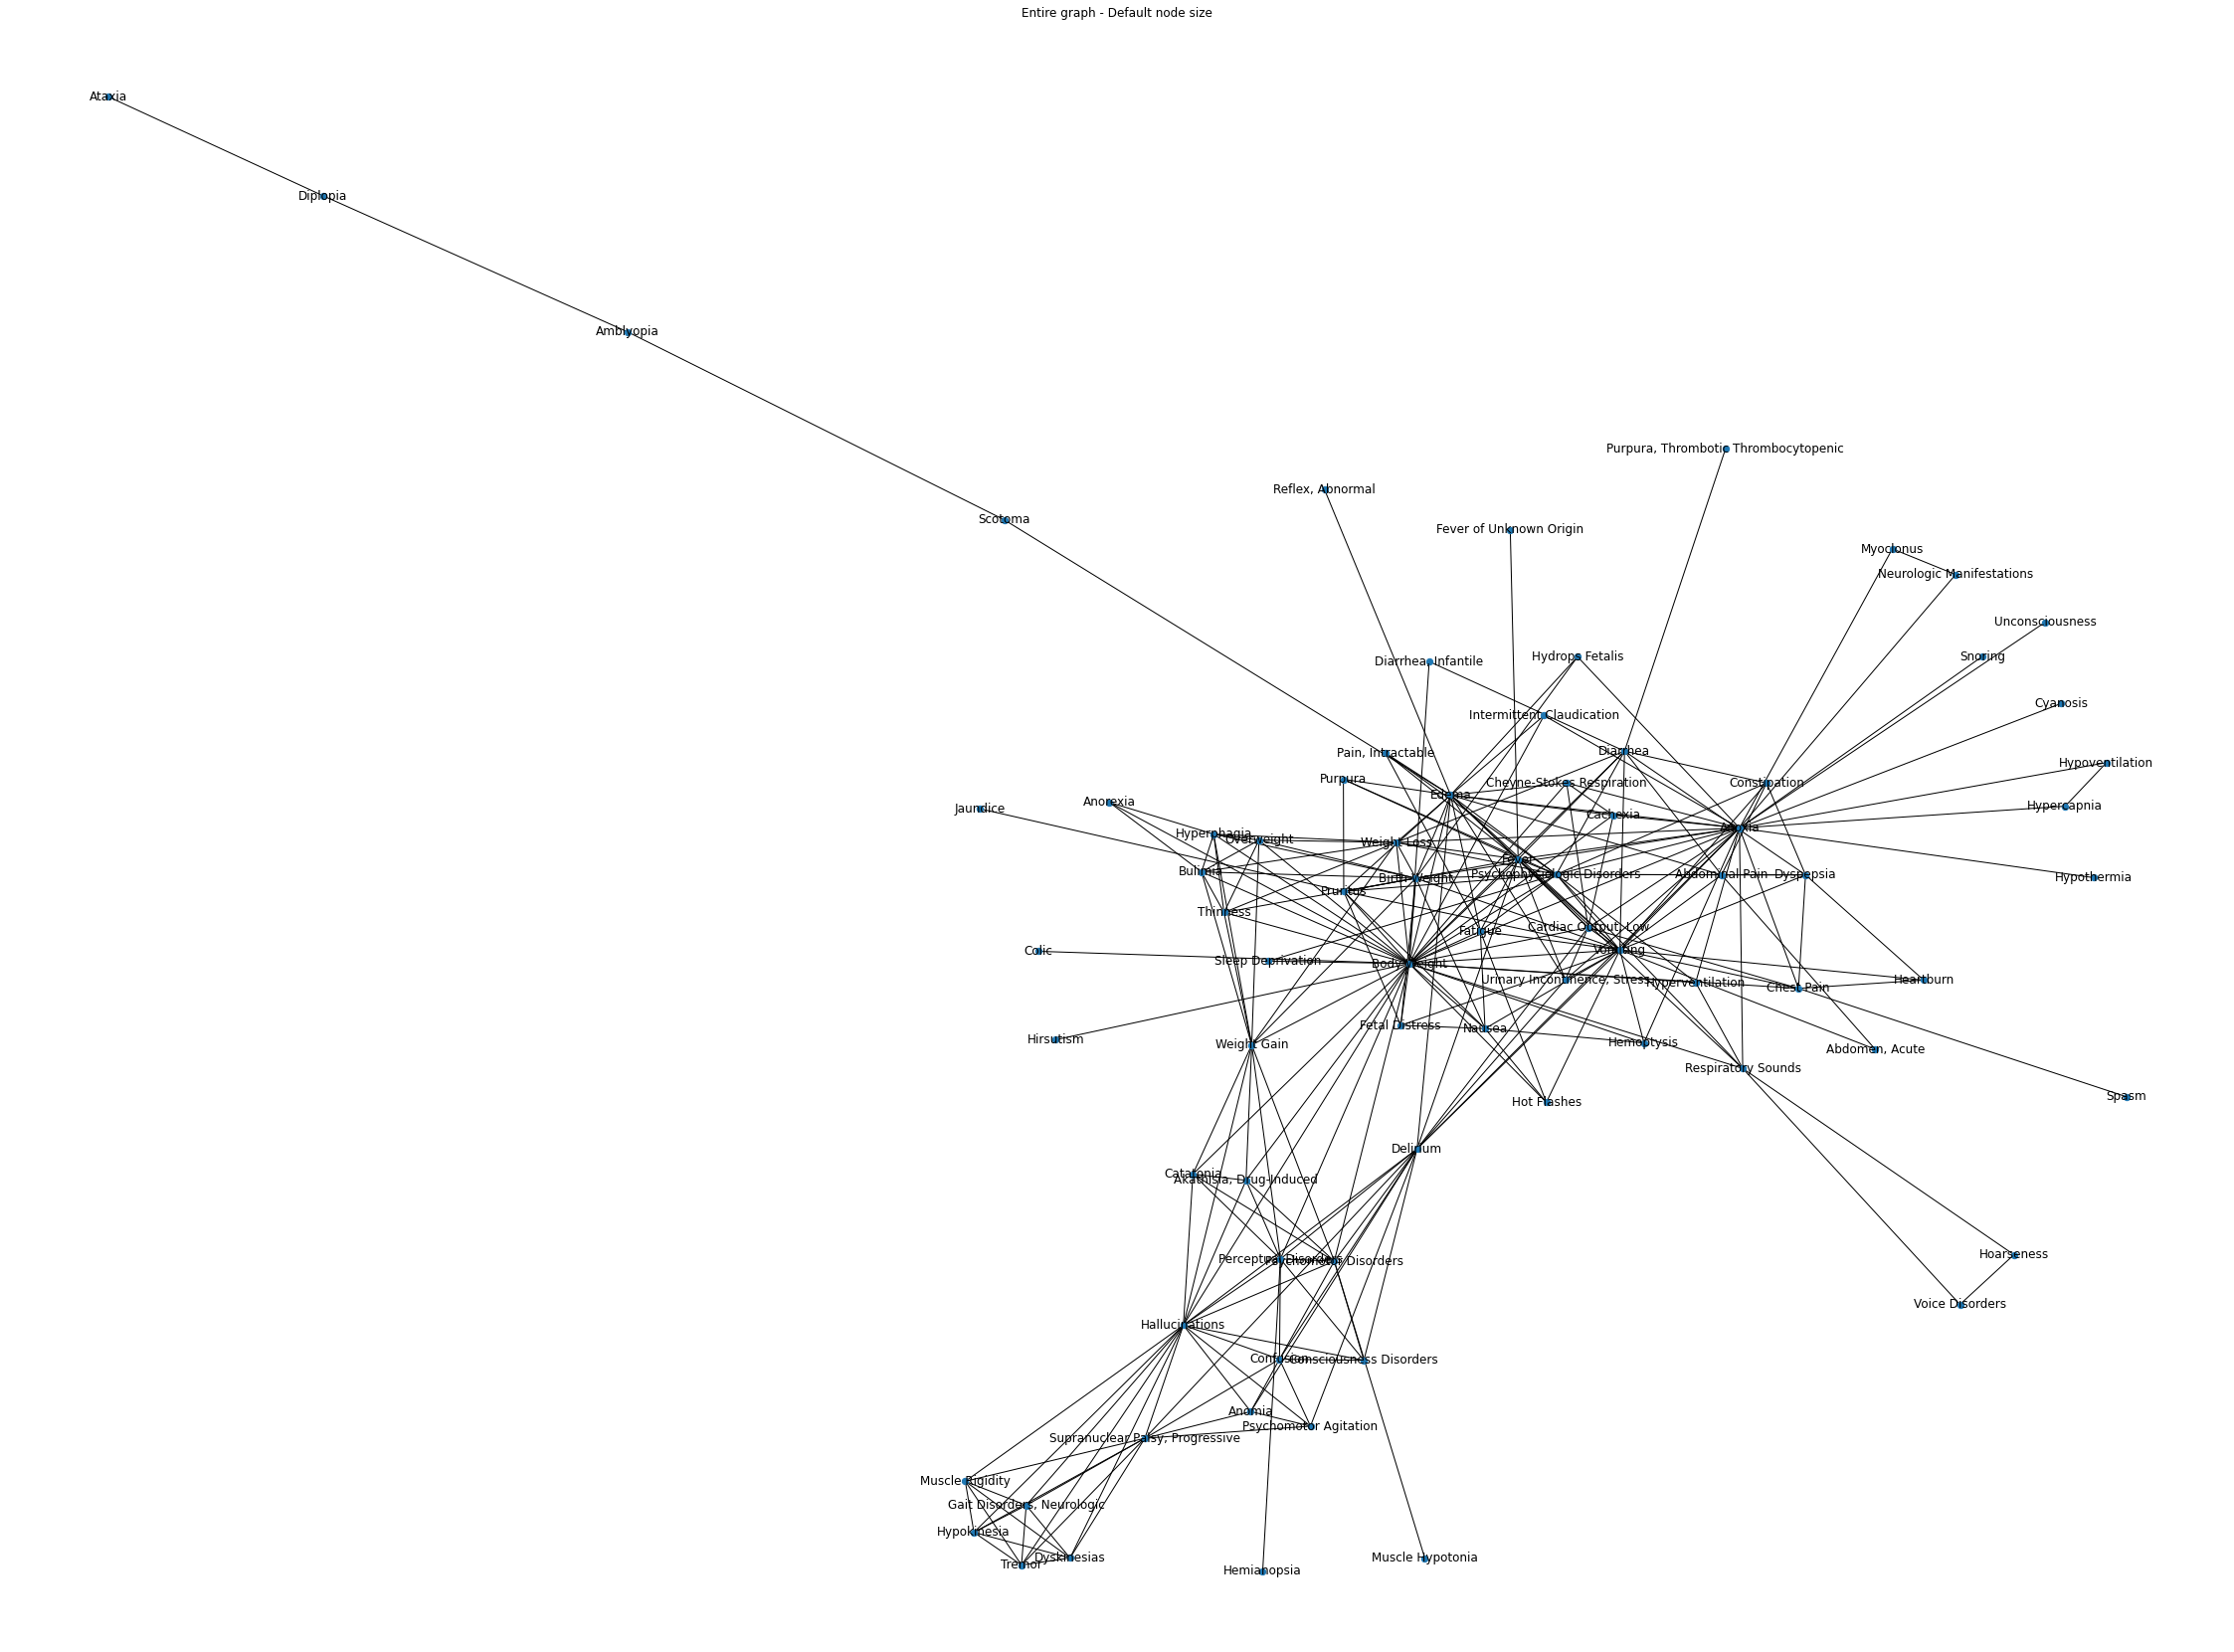

In [175]:
t = time.time()
spring_pos = nx.spring_layout(Gph_N1) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)
fig = plt.figure(figsize = (40, 30))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(Gph_N1, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = True)
plt.title("Entire graph - Default node size")
plt.close();

fig

## Visualization: Diseases

Time elapsed to get the graph layout:  0.11975359916687012


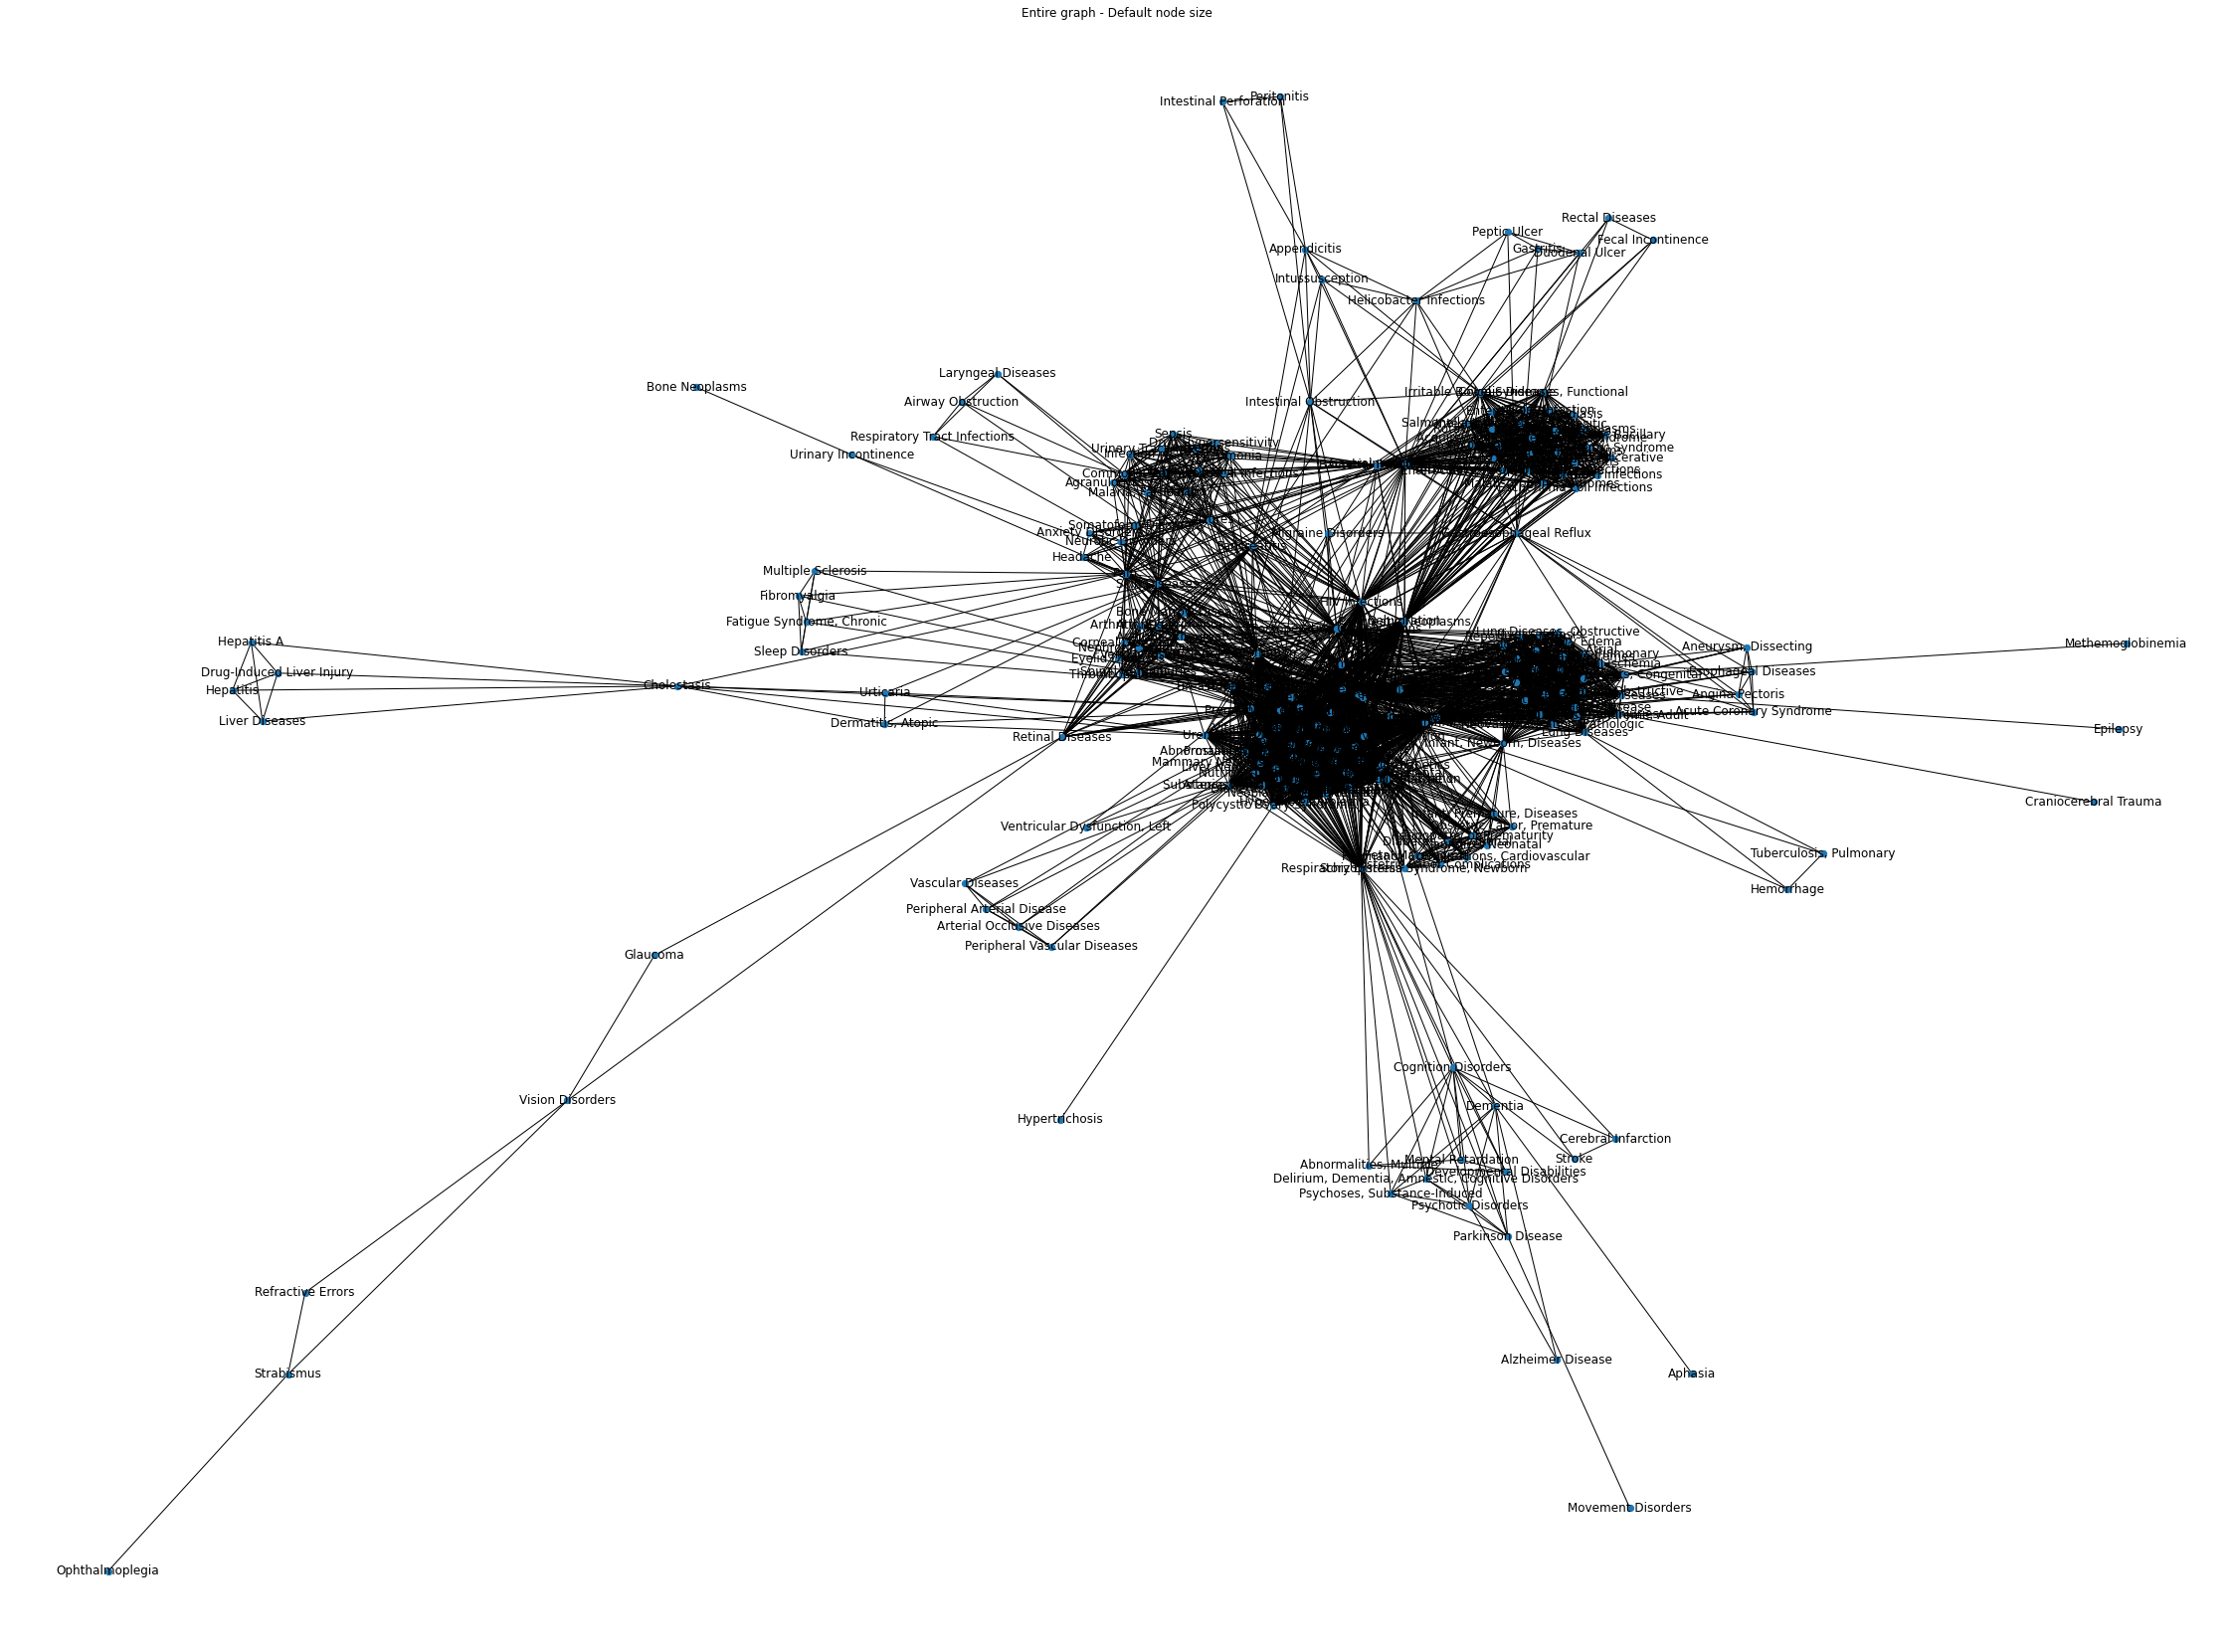

In [176]:
t = time.time()
spring_pos = nx.spring_layout(Gph_N2) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)
fig = plt.figure(figsize = (40, 30))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(Gph_N2, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = True)
plt.title("Entire graph - Default node size")
plt.close();

fig

In [177]:
# Network metric statistics
def network_metric_statistics(metric_data):
    avg = stats.mean(metric_data)
    med = stats.median(metric_data)
    std = stats.stdev(metric_data)
    
    return("Here is a quick summary of your data: average = " + '{:.5f}'.format(avg) + ", median = " + '{:.5f}'.format(med) + ", standard deviation = " + '{:.5f}'.format(std))

## Degrees: Symptoms 

In [178]:
#Gph_N1.degree

In [179]:
N1s = [d for d in N1]
N1s_degrees = [Gph_N1.degree[d] for d in N1]

In [180]:
N1s_order = [x for y, x in sorted(zip(N1s_degrees, N1s), reverse=True)]
N1s_degrees_order = sorted((Gph_N1.degree[d] for d in N1), reverse=True)

In [181]:
print("TOP 5 N1: \n",N1s_order[:5]) # from largest to smallest degree value
print("TOP 5 N1 DEGREES: \n",N1s_degrees_order[:5]) # from largest to smallest degree value

TOP 5 N1: 
 ['Body Weight', 'Anoxia', 'Vomiting', 'Edema', 'Psychophysiologic Disorders']
TOP 5 N1 DEGREES: 
 [36, 26, 22, 21, 18]


In [182]:
network_metric_statistics(N1s_degrees_order)

'Here is a quick summary of your data: average = 6.46154, median = 5.00000, standard deviation = 6.31776'

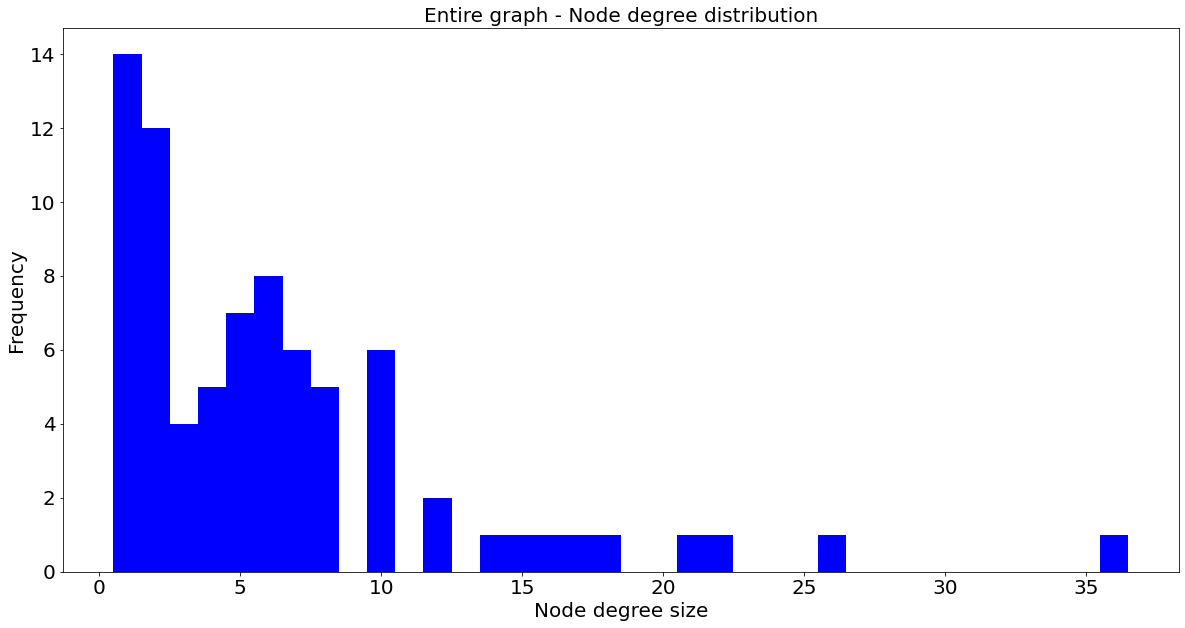

In [183]:
degree_count = collections.Counter(N1s_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution", fontsize=20)
plt.show()

## Degrees: Diseases

In [184]:
#Gph_N2.degree

In [185]:
N2s = [d for d in N2]
N2s_degrees = [Gph_N2.degree[d] for d in N2]

In [186]:
N2s_order = [x for y, x in sorted(zip(N2s_degrees, N2s), reverse=True)]
N2s_degrees_order = sorted((Gph_N2.degree[d] for d in N2), reverse=True)

In [187]:
print("TOP 5 N2: \n",N2s_order[:5]) # from largest to smallest degree value
print("TOP 5 N2 DEGREES: \n",N2s_degrees_order[:5]) # from largest to smallest degree value

TOP 5 N2: 
 ['Hypertension', 'Heart Failure', 'HIV Infections', 'Asthma', 'Myocardial Infarction']
TOP 5 N2 DEGREES: 
 [123, 109, 107, 104, 98]


In [188]:
network_metric_statistics(N2s_degrees_order)

'Here is a quick summary of your data: average = 34.00877, median = 31.00000, standard deviation = 26.74302'

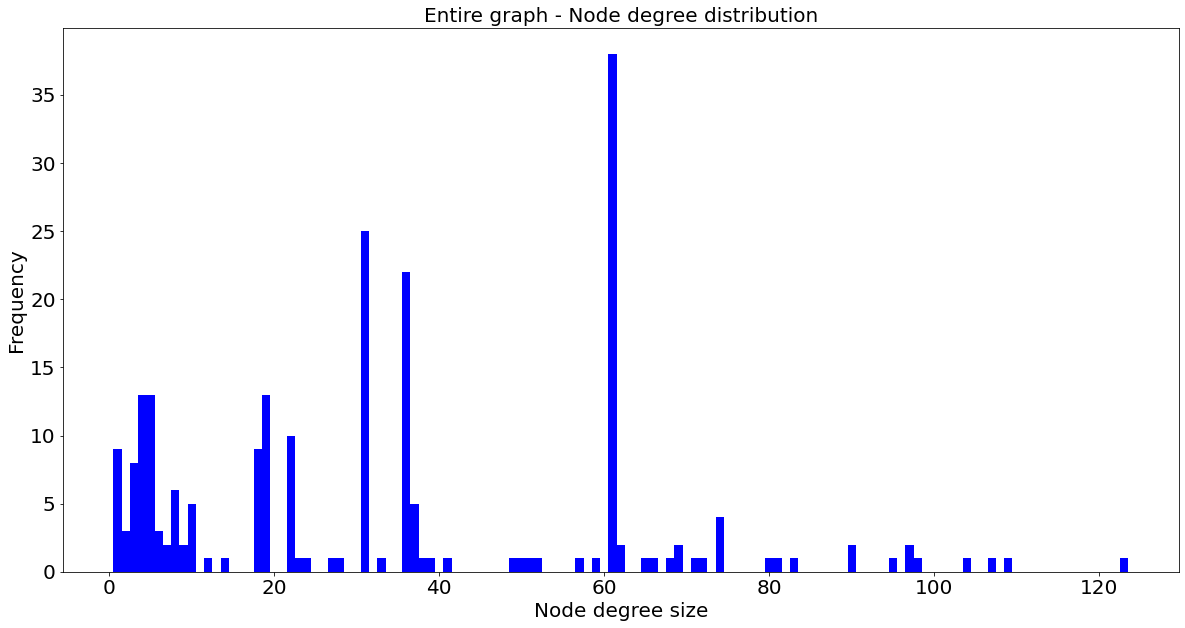

In [189]:
degree_count = collections.Counter(N2s_degrees_order)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution", fontsize=20)
plt.show()

## Centralities: Symptoms

In [190]:
# degree centrality
deg = nx.degree_centrality(Gph_N1)
sorted(deg.items(), key=lambda item: item[1], reverse=True)[:5]

[('Body Weight', 0.4675324675324676),
 ('Anoxia', 0.33766233766233766),
 ('Vomiting', 0.28571428571428575),
 ('Edema', 0.27272727272727276),
 ('Psychophysiologic Disorders', 0.2337662337662338)]

In [191]:
# closeness centrality
closeness = nx.closeness_centrality(Gph_N1)
sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5]

[('Body Weight', 0.6209677419354839),
 ('Anoxia', 0.5384615384615384),
 ('Vomiting', 0.5238095238095238),
 ('Edema', 0.5238095238095238),
 ('Fever', 0.506578947368421)]

In [192]:
# eigenvector centrality
eig = nx.eigenvector_centrality(Gph_N1)
sorted(eig.items(), key=lambda item: item[1], reverse=True)[:5]

[('Body Weight', 0.38651154008033844),
 ('Vomiting', 0.2827224283691102),
 ('Edema', 0.2737104582303613),
 ('Anoxia', 0.2713420442007912),
 ('Psychophysiologic Disorders', 0.25054068259063467)]

In [193]:
# betweeness centrality
betw = nx.betweenness_centrality(Gph_N1)
sorted(betw.items(), key=lambda item: item[1], reverse=True)[:5]

[('Body Weight', 0.37895042386970734),
 ('Anoxia', 0.23426722871256658),
 ('Edema', 0.1666075368816513),
 ('Hallucinations', 0.13184664615447458),
 ('Delirium', 0.12242212674543504)]

## Centralities: Diseases

In [194]:
# degree centrality
deg = nx.degree_centrality(Gph_N2)
sorted(deg.items(), key=lambda item: item[1], reverse=True)[:5]

[('Hypertension', 0.5418502202643173),
 ('Heart Failure', 0.48017621145374456),
 ('HIV Infections', 0.4713656387665199),
 ('Asthma', 0.4581497797356829),
 ('Myocardial Infarction', 0.43171806167400884)]

In [195]:
# closeness centrality
closeness = nx.closeness_centrality(Gph_N2)
sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5]

[('Hypertension', 0.6598837209302325),
 ('Heart Failure', 0.6253443526170799),
 ('Asthma', 0.6168478260869565),
 ('HIV Infections', 0.6168478260869565),
 ('Myocardial Infarction', 0.5989445910290238)]

In [196]:
# eigenvector centrality
eig = nx.eigenvector_centrality(Gph_N2)
sorted(eig.items(), key=lambda item: item[1], reverse=True)[:5]

[('Hypertension', 0.1441108816432824),
 ('Heart Failure', 0.14058387055664195),
 ('Asthma', 0.13816867242484462),
 ('Myocardial Infarction', 0.13660841918400035),
 ('Coronary Disease', 0.13652641764271337)]

In [197]:
# betweeness centrality
betw = nx.betweenness_centrality(Gph_N2)
sorted(betw.items(), key=lambda item: item[1], reverse=True)[:5]

[('Postoperative Complications', 0.09447852396103923),
 ('Schizophrenia', 0.08892453558095761),
 ('HIV Infections', 0.08317374828593276),
 ('Hypertension', 0.07069802406323916),
 ('Gastrointestinal Diseases', 0.06713498734213375)]

## Communities with Louvain: Symptoms

In [198]:
spring_pos = nx.spring_layout(Gph_N1) # might take a little while
node_size_default = 40

In [199]:
# partition = community.best_partition(GC) # idk if this works for v1 
partition = community_louvain.best_partition(Gph_N1)
communities = [partition.get(node) for node in Gph_N1.nodes()]
print('The number of communities is ' + str(max(communities)) + '.')

The number of communities is 4.


In [200]:
# Let's assign each node to its given community
nx.set_node_attributes(Gph_N1, partition, name='community')

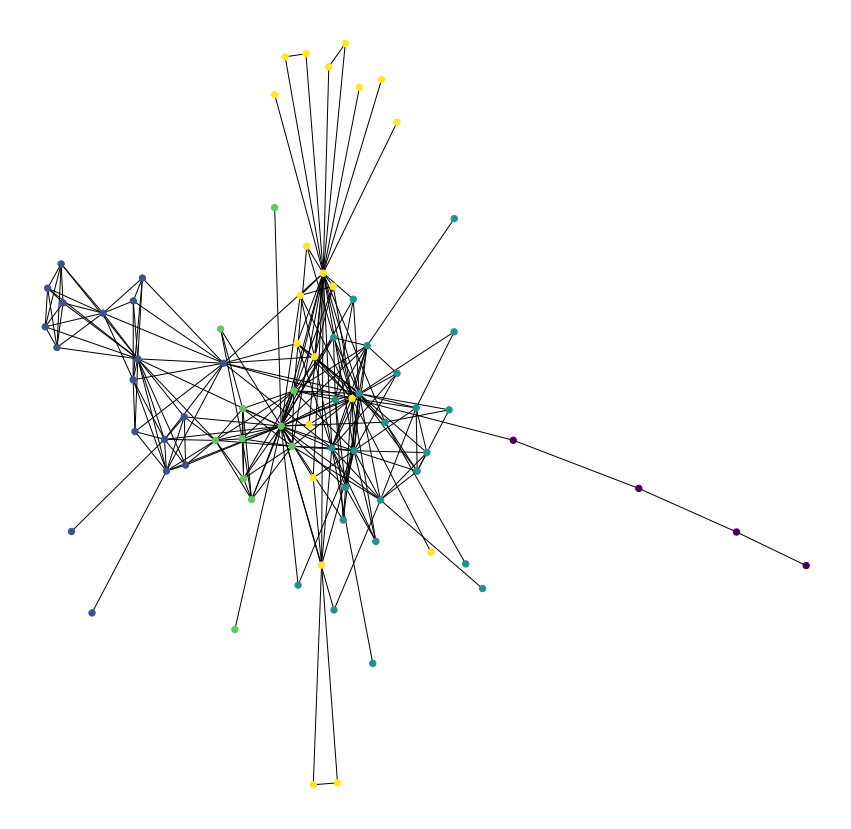

In [201]:
colors = [Gph_N1.nodes[n]['community'] for n in Gph_N1.nodes]

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
ax.axis('off')

n = nx.draw_networkx(Gph_N1, 
        spring_pos, 
        ax = ax, 
        node_size = node_size_default,
        with_labels = False,
        node_color = communities)

plt.close();
fig

## Communities with Louvain: Diseases

In [215]:
spring_pos = nx.spring_layout(Gph_N2) # might take a little while
node_size_default = 40

In [216]:
# partition = community.best_partition(GC) # idk if this works for v1 
partition = community_louvain.best_partition(Gph_N2)
communities = [partition.get(node) for node in Gph_N2.nodes()]
num_communities = max(communities)+1

print('The number of communities is ' + str(num_communities))

The number of communities is 7


In [217]:
# Let's assign each node to its given community
nx.set_node_attributes(Gph_N2, partition, name='community')

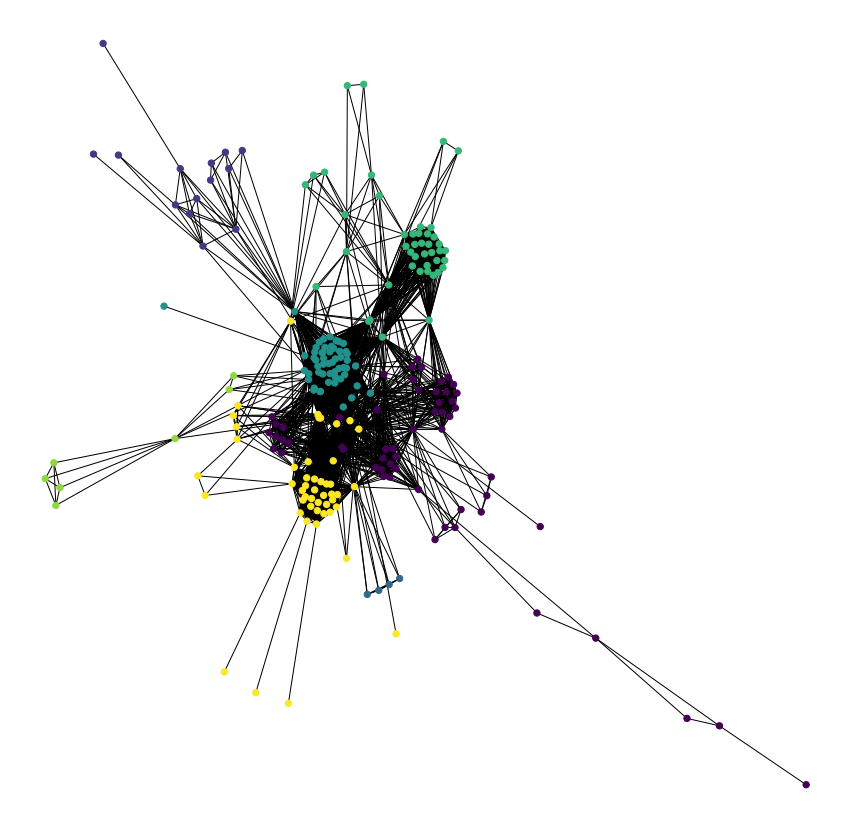

In [218]:
colors = [Gph_N2.nodes[n]['community'] for n in Gph_N2.nodes]

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
ax.axis('off')

n = nx.draw_networkx(Gph_N2, 
        spring_pos, 
        ax = ax, 
        node_size = node_size_default,
        with_labels = False,
        node_color = communities)

plt.close();
fig

## Analyzing the communities of Diseases

In [219]:
res = {}
for i, v in partition.items():
    res[v] = [i] if v not in res.keys() else res[v] + [i]
print(res)

{6: ['Myocardial Ischemia', 'Reperfusion Injury', 'Ventricular Dysfunction, Left', 'Coronary Disease', 'Polycythemia', 'Angina Pectoris', 'Epilepsy', 'Lung Diseases', 'Asthma', 'Esophageal Diseases', 'Fetal Diseases', 'Neovascularization, Pathologic', 'Gastroesophageal Reflux', 'Methemoglobinemia', 'Altitude Sickness', 'Pulmonary Embolism', 'Heart Defects, Congenital', 'Acute Coronary Syndrome', 'Infant, Newborn, Diseases', 'Urinary Incontinence', 'Liver Cirrhosis', 'Heart Septal Defects, Atrial', 'Tuberculosis, Pulmonary', 'Coronary Artery Disease', 'Myocardial Infarction', 'Postoperative Complications', 'Acidosis', 'Apnea', 'Sleep Apnea Syndromes', 'Pulmonary Heart Disease', 'Heart Failure', 'Brain Ischemia', 'Aneurysm, Dissecting', 'Craniocerebral Trauma', 'Dyspnea', 'Anemia', 'Sleep Apnea, Obstructive', 'Brain Diseases', 'Pulmonary Edema', 'Ischemia', 'Hemorrhage', 'Hypertension, Pulmonary', 'Heart Arrest', 'Respiratory Insufficiency', 'Brain Injuries', 'Lung Diseases, Obstructive'

In [220]:
print(res[0])

['Retinal Diseases', 'Pneumonia', 'Retinopathy of Prematurity', 'Respiratory Tract Infections', 'Fibromyalgia', 'Fetal Macrosomia', 'Ophthalmoplegia', 'Arthritis, Experimental', 'Airway Obstruction', 'Corneal Diseases', 'Leukemia', 'Malaria', 'Urinary Tract Infections', 'Pre-Eclampsia', 'Pain', 'Neutropenia', 'Spinal Cord Injuries', 'Headache', 'Obstetric Labor, Premature', 'Hypertension', 'Fatigue Syndrome, Chronic', 'Arthritis, Rheumatoid', 'Vision Disorders', 'Somatoform Disorders', 'Glaucoma', 'Pancreatitis', 'Infection', 'Malaria, Falciparum', 'Toxemia', 'Pregnancy Complications, Cardiovascular', 'Bone Marrow Diseases', 'Jaundice, Neonatal', 'Bacteremia', 'Neurotic Disorders', 'Diabetes, Gestational', 'Seizures', 'Staphylococcal Infections', 'Strabismus', 'Eyelid Diseases', 'Skin Diseases', 'Bone Neoplasms', 'Multiple Sclerosis', 'Obstetric Labor Complications', 'Drug Hypersensitivity', 'Respiratory Distress Syndrome, Newborn', 'Venous Insufficiency', 'Sleep Disorders', 'Arthritis

In [315]:
def process_one_community(community_val):

    # Consider the rows that are in comm with the disseases of the commmmunity
    edges_tmp = edges_[edges_['MeSH Disease Term'].isin(community_val)]
    
    syms_sorted_top = ["none"]
    percent = 0
    name_community = "none"
    
    # filter communities with only more than 3 nodes of symptoms
    if len(edges_tmp['MeSH Symptom Term'].unique())>3:

        # Both parts of the bipartie
        part0_tmp = edges_tmp['MeSH Symptom Term'].unique()
        part1_tmp = edges_tmp['MeSH Disease Term'].unique()

        # Symptom // Disease
        joins_tmp = list(edges_tmp.to_records(index=False))

        # Start Bigraph
        BI_tmp = nx.Graph()
        BI_tmp.add_nodes_from(part0_tmp, bipartite=0)
        BI_tmp.add_nodes_from(part1_tmp, bipartite=1)
        BI_tmp.add_edges_from(joins_tmp)

        # Information
        #print(nx.info(BI_tmp))

        # Taking the largest connected component
        #components = sorted(nx.connected_components(BI_tmp), key=len, reverse=True)
        #largest_component = components[0]
        #BII_tmp = BI_tmp.subgraph(largest_component)

        # Information
        #print(nx.info(BII_tmp))

        # Graph: Symptoms // Diseases
        fig = plt.figure(figsize = (12, 12))
        ax = fig.add_subplot(111)
        ax.axis('off')
        N1, N2 = bipartite.sets(BI_tmp)
        pos = dict()
        pos.update( (n, (1, i)) for i, n in enumerate(N1) ) # put nodes from N1
        pos.update( (n, (2, i)) for i, n in enumerate(N2) ) # put nodes from N2
        nx.draw(BI_tmp, pos=pos, with_labels=True)
        plt.show()

        # extract degrees
        degX, degY = bipartite.degrees(BI_tmp, N1)
        degY = dict(degY)
        syms_sorted = dict(sorted(degY.items(), key=lambda item: item[1], reverse=True))

        # printing the sorted symptoms
        for key, value in syms_sorted.items():
            print(key, ': ', value)

        for diss in list(N2):
            if diss =="Cognition Disorders":
                name_community = "Mental disorders"
            if diss =="Bacterial Infections":
                name_community = "Bacterial infections"
            if diss =="Deficiency Diseases":
                name_community = "Malnutrition deficiency"
            if diss =="Lung Diseases":
                name_community = "Lung or heart problems"
            if diss =="Corneal Diseases":
                name_community = "Vision or Pregnancy problems"
          
        print("\nName community: ",name_community)

        # select only the top symptoms with more or equal to 3 degree
        syms_sorted_top = [k for k,v in syms_sorted.items() if float(v) >= 3]

        # select the edges of the top symptoms 
        edges_tmp2 = edges_tmp[edges_tmp['MeSH Symptom Term'].isin(syms_sorted_top)]

        # number of partial diseases detected with the symptoms in the community
        partial_diseas_ = len(edges_tmp2['MeSH Disease Term'])
        
        # only for verfication
        #print(edges_tmp2['MeSH Disease Term'].unique())

        # number of all diseases in the community
        all_diseas_ = len(edges_tmp['MeSH Disease Term'])

        percent = round(partial_diseas_*100/all_diseas_,2)

        print("\nTop symptoms:", syms_sorted_top)

        print("\nTop symptoms detects the", str(percent), "%", "of the diseases in the community")
    
    else:
        print("\nCommunity too small")

    return syms_sorted_top, percent, name_community




####################### ####################### ####################### #######################
0


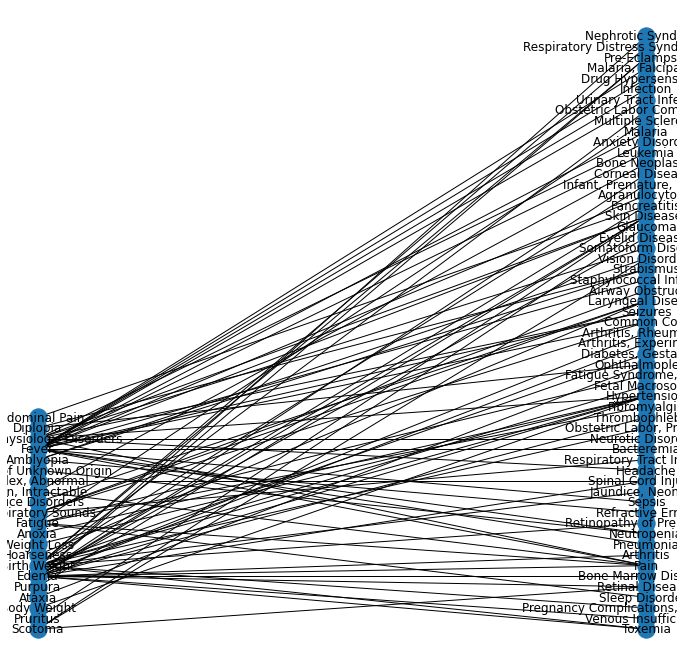

Edema :  17
Fever :  16
Birth Weight :  12
Psychophysiologic Disorders :  8
Fatigue :  5
Respiratory Sounds :  4
Scotoma :  3
Amblyopia :  3
Pain, Intractable :  2
Diplopia :  2
Voice Disorders :  1
Pruritus :  1
Body Weight :  1
Reflex, Abnormal :  1
Ataxia :  1
Purpura :  1
Fever of Unknown Origin :  1
Hoarseness :  1
Weight Loss :  1
Anoxia :  1
Abdominal Pain :  1

Name community:  Vision or Pregnancy problems

Top symptoms: ['Edema', 'Fever', 'Birth Weight', 'Psychophysiologic Disorders', 'Fatigue', 'Respiratory Sounds', 'Scotoma', 'Amblyopia']

Top symptoms detects the 81.93 % of the diseases in the community



####################### ####################### ####################### #######################
1


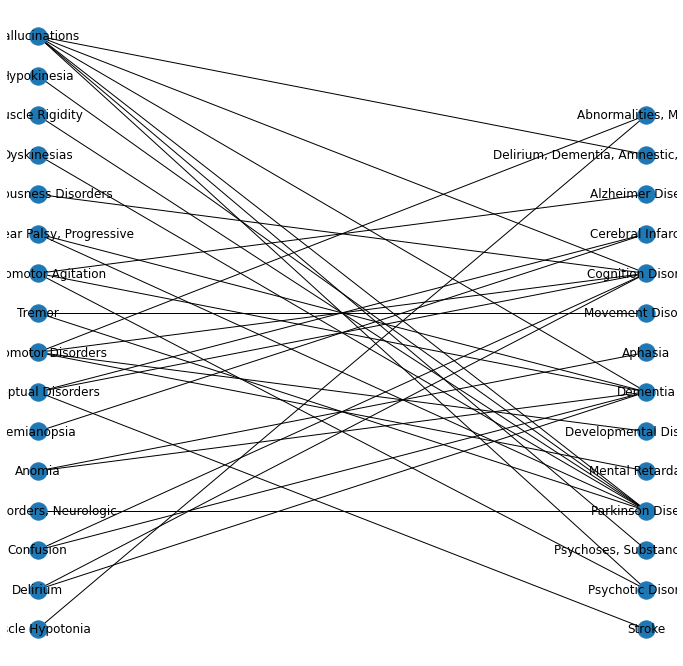

Hallucinations :  6
Psychomotor Disorders :  4
Perceptual Disorders :  3
Psychomotor Agitation :  3
Delirium :  2
Confusion :  2
Anomia :  2
Tremor :  2
Supranuclear Palsy, Progressive :  2
Muscle Hypotonia :  1
Consciousness Disorders :  1
Dyskinesias :  1
Hypokinesia :  1
Gait Disorders, Neurologic :  1
Hemianopsia :  1
Muscle Rigidity :  1

Name community:  Mental disorders

Top symptoms: ['Hallucinations', 'Psychomotor Disorders', 'Perceptual Disorders', 'Psychomotor Agitation']

Top symptoms detects the 48.48 % of the diseases in the community



####################### ####################### ####################### #######################
2

Community too small



####################### ####################### ####################### #######################
3


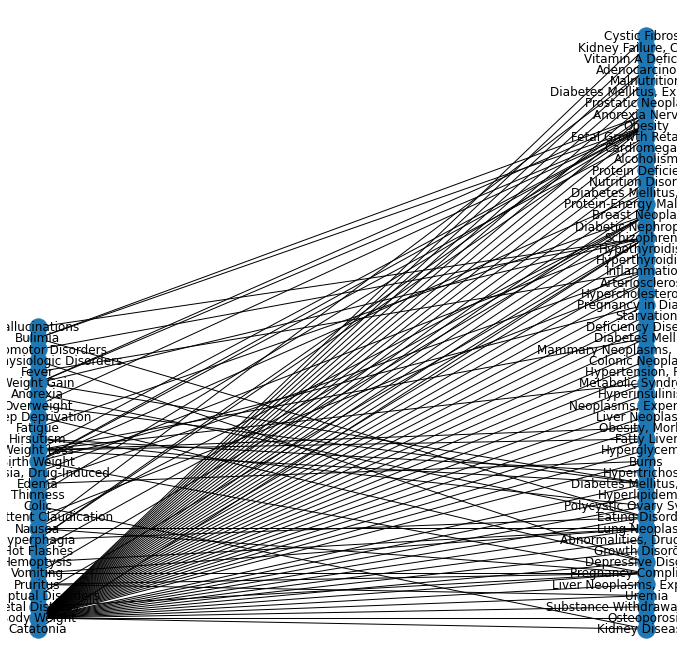

Body Weight :  53
Weight Loss :  6
Birth Weight :  5
Nausea :  4
Weight Gain :  4
Vomiting :  3
Hyperphagia :  3
Bulimia :  3
Pruritus :  2
Overweight :  2
Edema :  2
Hirsutism :  2
Catatonia :  1
Sleep Deprivation :  1
Fetal Distress :  1
Perceptual Disorders :  1
Hemoptysis :  1
Hot Flashes :  1
Intermittent Claudication :  1
Colic :  1
Thinness :  1
Anorexia :  1
Akathisia, Drug-Induced :  1
Fever :  1
Psychophysiologic Disorders :  1
Psychomotor Disorders :  1
Fatigue :  1
Hallucinations :  1

Name community:  Malnutrition deficiency

Top symptoms: ['Body Weight', 'Weight Loss', 'Birth Weight', 'Nausea', 'Weight Gain', 'Vomiting', 'Hyperphagia', 'Bulimia']

Top symptoms detects the 77.14 % of the diseases in the community



####################### ####################### ####################### #######################
4


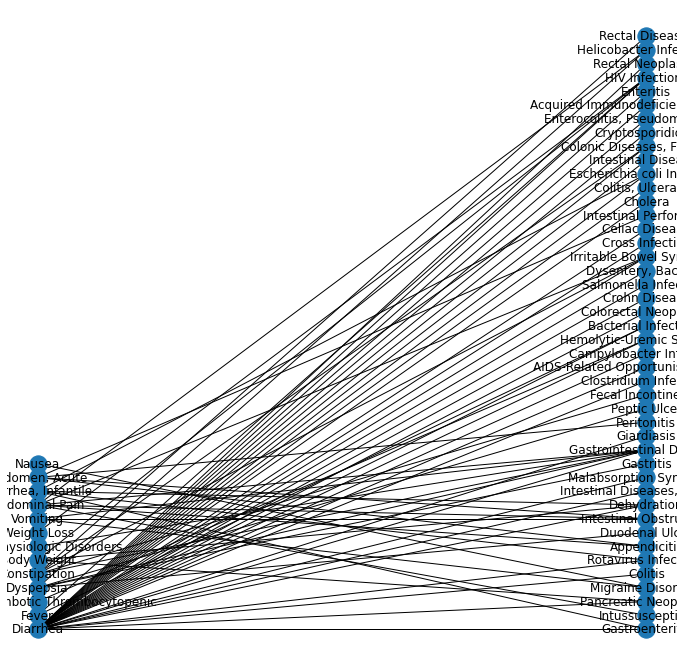

Diarrhea :  32
Abdominal Pain :  6
Dyspepsia :  5
Constipation :  5
Diarrhea, Infantile :  4
Abdomen, Acute :  4
Body Weight :  3
Vomiting :  3
Fever :  2
Purpura, Thrombotic Thrombocytopenic :  1
Psychophysiologic Disorders :  1
Weight Loss :  1
Nausea :  1

Name community:  Bacterial infections

Top symptoms: ['Diarrhea', 'Abdominal Pain', 'Dyspepsia', 'Constipation', 'Diarrhea, Infantile', 'Abdomen, Acute', 'Body Weight', 'Vomiting']

Top symptoms detects the 91.18 % of the diseases in the community



####################### ####################### ####################### #######################
5

Community too small



####################### ####################### ####################### #######################
6


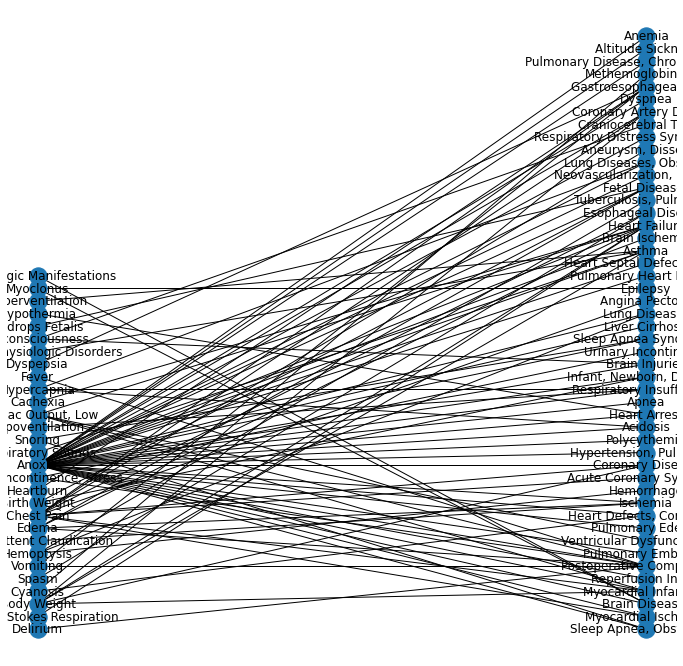

Anoxia :  36
Chest Pain :  9
Body Weight :  5
Cardiac Output, Low :  4
Edema :  4
Hemoptysis :  3
Hypercapnia :  3
Cyanosis :  2
Vomiting :  2
Birth Weight :  2
Unconsciousness :  2
Urinary Incontinence, Stress :  2
Myoclonus :  2
Snoring :  2
Delirium :  1
Cheyne-Stokes Respiration :  1
Spasm :  1
Hypoventilation :  1
Intermittent Claudication :  1
Cachexia :  1
Fever :  1
Dyspepsia :  1
Heartburn :  1
Psychophysiologic Disorders :  1
Hydrops Fetalis :  1
Hypothermia :  1
Hyperventilation :  1
Neurologic Manifestations :  1
Respiratory Sounds :  1

Name community:  Lung or heart problems

Top symptoms: ['Anoxia', 'Chest Pain', 'Body Weight', 'Cardiac Output, Low', 'Edema', 'Hemoptysis', 'Hypercapnia']

Top symptoms detects the 68.82 % of the diseases in the community


In [329]:
name_comm_all = []
tops_syms_all = []
percs_syms_all = []

for idx in range(0,num_communities):
    print("\n\n\n####################### ####################### ####################### #######################")
    print(idx)
    tops_syms, percs_syms, name_comm = process_one_community(res[idx])
    if tops_syms != ["none"]:
        name_comm_all.append(name_comm)
        tops_syms_all.append(tops_syms)
        percs_syms_all.append(percs_syms)

In [331]:
# Show all the communities names
print(name_comm_all)

['Vision or Pregnancy problems', 'Mental disorders', 'Malnutrition deficiency', 'Bacterial infections', 'Lung or heart problems']


In [332]:
# List of all the symptoms
print(tops_syms_all)

[['Edema', 'Fever', 'Birth Weight', 'Psychophysiologic Disorders', 'Fatigue', 'Respiratory Sounds', 'Scotoma', 'Amblyopia'], ['Hallucinations', 'Psychomotor Disorders', 'Perceptual Disorders', 'Psychomotor Agitation'], ['Body Weight', 'Weight Loss', 'Birth Weight', 'Nausea', 'Weight Gain', 'Vomiting', 'Hyperphagia', 'Bulimia'], ['Diarrhea', 'Abdominal Pain', 'Dyspepsia', 'Constipation', 'Diarrhea, Infantile', 'Abdomen, Acute', 'Body Weight', 'Vomiting'], ['Anoxia', 'Chest Pain', 'Body Weight', 'Cardiac Output, Low', 'Edema', 'Hemoptysis', 'Hypercapnia']]


In [333]:
# Some metrics
avg = stats.mean(percs_syms_all)
med = stats.median(percs_syms_all)
std = stats.stdev(percs_syms_all)
print("Percentages:", percs_syms_all)
print("Avg:", round(avg,2))
print("Std:", round(std,2))
print("Med:", round(med,2))

Percentages: [81.93, 48.48, 77.14, 91.18, 68.82]
Avg: 73.51
Std: 16.16
Med: 77.14


## Predict the disease category based on symptoms

In [387]:
df = pd.DataFrame({'Symptoms': tops_syms_all, 'Disease Category': name_comm_all, 'Percentage': percs_syms_all})

In [388]:
df

Symptoms  \
0  [Edema, Fever, Birth Weight, Psychophysiologic...   
1  [Hallucinations, Psychomotor Disorders, Percep...   
2  [Body Weight, Weight Loss, Birth Weight, Nause...   
3  [Diarrhea, Abdominal Pain, Dyspepsia, Constipa...   
4  [Anoxia, Chest Pain, Body Weight, Cardiac Outp...   

               Disease Category  Percentage  
0  Vision or Pregnancy problems       81.93  
1              Mental disorders       48.48  
2       Malnutrition deficiency       77.14  
3          Bacterial infections       91.18  
4        Lung or heart problems       68.82

In [389]:
def pred_categ_disease(symtoms):
    for symt in symtoms:
        for idx in range(0,len(df)):
            if symt in df["Symptoms"][idx]:
                diss_categ = df["Disease Category"][idx]
                percent_categ = df["Percentage"][idx]
                print("Predicted disease: "+diss_categ)
                print("Top symptoms detects the "+str(percent_categ)+" % of the diseases in the community")

In [390]:
pred_categ_disease(["Weight Loss"])

Predicted disease: Malnutrition deficiency
Top symptoms detects the 77.14 % of the diseases in the community


In [391]:
pred_categ_disease(["Nausea"])

Predicted disease: Malnutrition deficiency
Top symptoms detects the 77.14 % of the diseases in the community


In [392]:
pred_categ_disease(["Dyspepsia"])

Predicted disease: Bacterial infections
Top symptoms detects the 91.18 % of the diseases in the community


In [393]:
pred_categ_disease(["Chest Pain"])

Predicted disease: Lung or heart problems
Top symptoms detects the 68.82 % of the diseases in the community
